# COGS 108 - Final Project


# Overview

Our project explores the effect of Airbnb in rent prices of San Diego. The data sets include average rent prices from Zillow from 2011 to 2018 and utilize Airbnb's data from 2014 to 2017. We then analyze this by using cross-correlation to observe if Airbnb has a reasonable contribution to the change in San Diego's rent prices.

# Names

* John Kim

* Oscar Reyes

* Hae-Chan Grace Kim

* Edgar Matias

* Aaron Hernandez


# Research Question
 
How does Airbnb's rental play a role in affecting the rental prices of San Diego? Would it have a signifcant impact in increasing or decreasing rental prices of San Diego neighborhoods?

# Background and Prior Work

Over the years, Airbnb has been dominating to market in the rental industry and with 660,000 listings alone in the United States of this year, a study done in Boston 2016 suggested a 10% increase in Airbnb listings led to a 0.42% increase in rent prices being asked in that area (1).

As avid Airbnb users, we realized that using this service is more appealing to our demographic as in "2018, 58% of hosts and booking guests worldwide were millennials". When looking for places to stay, people tend to open up Airbnb rather than using other third-party apps or services that offer stays such as Hotels.com or Booking.com. We began to wonder why this is the case and wanted to look into the impact it can bring on the price of the general renting market in a specific city (2). 

What makes this topic interesting is the fact that Airbnb offers services such as short-term and long-term stays which can almost replace the traditional renting space options such as month to month rent or hotel options. Oftentimes Airbnb’s are preferred for long-term stays since the consumer has access to a place equipped with a better living situation with perks such as a kitchen, a TV, and generally more spacious rooms. In regards to our hypothesis, we wanted to look at the positive or negative impact Airbnb can bring in a city in regards to rent prices. We were able to come up with this by looking at articles and publishings that attribute to the impact on hotel price strategy (3). This allows us to critically analyze and find patterns Airbnb introduces in the market of renting a space.
 
The topic and our dataset would be important to stakeholders such as renters and landlords. We also want to see the significance of how San Diego state bill was passed and its attribution to the importance of people living and coming to rent in this city (4). To help aid our direction for this topic by looking at two case studies where one looks into hotel vs Airbnb prices, while the other explains the impact Airbnb brings into the housing market. The study focusing on prices between hotel and Airbnb concluded that “Hotels more centrally located show more fierce competition with their Airbnb neighbors, with less central hotels less affected (5).” This highlights an interesting dynamic Airbnb brings into the market of rental spaces. Additionally, the other case study makes a statement about how there is a trend for absentee landlords to move their long-term rent to short-term rent (6).
 
References:

(1) https://www.sciencedirect.com/science/article/abs/pii/S1051137717300876

(2) https://ipropertymanagement.com/research/airbnb-statistics#how-does-airbnb-compare-to-hotels

(3) https://www.smartcitiesdive.com/ex/sustainablecitiescollective/airbnb-phenomenon-what-s-impact-cities/294081/

(4) https://www.sandiegouniontribune.com/business/tourism/story/2019-05-23/state-bill-clamping-down-on-airbnb-rentals-in-san-diego-clears-major-hurdle-in-state-assembly

(5) https://nycdatascience.com/blog/student-works/web-scraping/hotels-vs-airbnb-barcelona-case-study-proof-of-concept/

(6) https://phys.org/news/2019-08-airbnb-affect-rents-housing-prices.html

# Hypothesis

We hypothesize that having an Airbnb in a city will have a positive effect on driving rent prices of surrounding rentals down from the perspective of renters. With the competition of Airbnb in the rental market, we think it will make the landlords lower they’re prices to compete with Airbnb.

# Dataset(s)

## Airbnb rental price in San Deigo
* Dataset Name: Airbnb rental price in San Diego
* Link to the dataset: http://tomslee.net/airbnb-data-collection-get-the-data
* Number of observations: These datasets range from 2014 to 2017 and contains (1901 to 9911) rows and 14 columns.

These datasets consist of scrapings of Airbnb listings in San Diego. We used two months per year from 2014 to 2017 which totals 8 datasets from this source. We specifically chose 2 months to contrast the early and late part of the year to use it as a comparison to the rental price found in Zillow below. 

## Zillow average rent price 
* Dataset Name: Zillow Rent data
* Link to the dataset: https://www.zillow.com/research/data/
* Number of observations: This dataset contains 9239 rows and 119 columns.

This data form Zillow's housing data which has a rent dataset ranging monthly from 2010 to 2019. There are multiple cities and rent prices according to their geolocation. We will clean the data to only includes observations from the city of San Diego. 

# Setup

We will include basic python packages for computing and analyzing our datasets. We will also use matplotlib and seaborn to plot out graphs and ultimately use it for our analysis protion.

In [1]:
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from scipy import stats
warnings.filterwarnings('ignore')
import matplotlib.ticker as mticker
#from plotly import express as px #install using: 'easy_install plotly==4.5.4'
from IPython.display import Image
cscale = [
          [0.0, 'rgb(165,0,38)'], 
          [0.0015, 'rgb(215,48,39)'], 
          [0.015, 'rgb(250, 152, 122)'], 
          [0.08, 'rgb(208, 254, 144)'], 
          [0.3, 'rgb(0, 255, 179)'], 
          [0.5, 'rgb(171,217,233)'], 
          [0.8, 'rgb(116,173,209)'], 
          [0.9, 'rgb(69,117,180)'], 
          [1.0, 'rgb(49,54,149)']
         ]

# Data Cleaning
For our data cleaning, we applied basic cleaning methods to dissect and get the observations we wanted while making the data cleaner to read. We took out values that were null and also datasets that did not have any recording of the full year range we are looking at. Lastly we also irrelevant observations such as not San Diego.

In [2]:
# load data set in csv
df_zillow_rent = pd.read_csv("Neighborhood_Zri_AllHomesPlusMultifamily.csv")
# check out the top 5 rows
df_zillow_rent.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-09,2010-10,2010-11,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
0,274772,Northeast Dallas,Dallas,TX,Dallas-Fort Worth-Arlington,Dallas County,1,1067.0,1073.0,1086.0,...,1361.0,1365.0,1369.0,1372.0,1373.0,1377.0,1393.0,1400.0,1402.0,1402.0
1,112345,Maryvale,Phoenix,AZ,Phoenix-Mesa-Scottsdale,Maricopa County,2,881.0,900.0,898.0,...,1169.0,1174.0,1183.0,1194.0,1205.0,1212.0,1227.0,1238.0,1242.0,1260.0
2,192689,Paradise,Las Vegas,NV,Las Vegas-Henderson-Paradise,Clark County,3,1095.0,1096.0,1102.0,...,1309.0,1317.0,1326.0,1336.0,1345.0,1352.0,1371.0,1375.0,1383.0,1389.0
3,270958,Upper West Side,New York,NY,New York-Newark-Jersey City,New York County,4,3203.0,3241.0,3248.0,...,3973.0,3965.0,3956.0,3949.0,3921.0,3945.0,4033.0,4080.0,4001.0,NaN
4,118208,South Los Angeles,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,5,1771.0,1797.0,1794.0,...,2373.0,2374.0,2379.0,2386.0,2389.0,2385.0,2381.0,2391.0,2369.0,2351.0


In [3]:
# Check out basic information about the datafram
df_zillow_rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5392 entries, 0 to 5391
Columns: 120 entries, RegionID to 2020-01
dtypes: float64(113), int64(2), object(5)
memory usage: 4.9+ MB


We were able to decide what to keep and not keep after viewing the general information and types of values we saw on the dataset. 

## Cleaning Zillow data set

The Zillow data includes many other locations apart from San Diego, so we dropped any rows that is not San Diego. Additionally we wanted to drop columns such as State, RegionID, and Size Rank.

### Clean the dataframe to only contain San Diego
We replaced the previous dataframe to narrow down our list to neighborhoods in San Diego. 

In [4]:
# replace dataframe to only contain San Diego rows in the City column
df_zillow_rent = df_zillow_rent[df_zillow_rent['City'] == 'San Diego']
# print results
df_zillow_rent

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2010-09,2010-10,2010-11,...,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
86,116625,Mira Mesa,San Diego,CA,San Diego-Carlsbad,San Diego County,87,1851.0,1860.0,1881.0,...,2408.0,2421.0,2434.0,2447.0,2453.0,2458.0,2473.0,2473.0,2503.0,2484.0
179,118673,University City,San Diego,CA,San Diego-Carlsbad,San Diego County,180,2049.0,2054.0,2058.0,...,2600.0,2615.0,2639.0,2668.0,2695.0,2717.0,2759.0,2741.0,2710.0,2695.0
186,117557,Rancho Penasquitos,San Diego,CA,San Diego-Carlsbad,San Diego County,187,1874.0,1859.0,1867.0,...,2409.0,2414.0,2425.0,2440.0,2454.0,2446.0,2426.0,2428.0,2463.0,2457.0
205,273140,Carmel Valley,San Diego,CA,San Diego-Carlsbad,San Diego County,206,2967.0,2952.0,2940.0,...,3267.0,3282.0,3288.0,3308.0,3318.0,3319.0,3337.0,3306.0,3293.0,3252.0
217,275127,Rancho Bernardo,San Diego,CA,San Diego-Carlsbad,San Diego County,218,1953.0,1976.0,1971.0,...,2424.0,2451.0,2470.0,2485.0,2482.0,2483.0,2481.0,2481.0,2510.0,2518.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4255,116638,Mission Beach,San Diego,CA,San Diego-Carlsbad,San Diego County,4256,3748.0,3772.0,3754.0,...,3561.0,3635.0,3683.0,3712.0,3690.0,3669.0,3693.0,3717.0,3722.0,3719.0
4775,116026,La Playa,San Diego,CA,San Diego-Carlsbad,San Diego County,4776,3234.0,3199.0,3155.0,...,3808.0,3799.0,3791.0,3786.0,3767.0,3751.0,3685.0,3688.0,3717.0,3757.0
4809,268312,Mission Valley West,San Diego,CA,San Diego-Carlsbad,San Diego County,4810,1876.0,1891.0,1902.0,...,2279.0,2277.0,2287.0,2303.0,2321.0,2329.0,2322.0,2373.0,2393.0,2407.0
5122,273355,Cortez Hill,San Diego,CA,San Diego-Carlsbad,San Diego County,5123,1930.0,1933.0,1960.0,...,2202.0,2223.0,2233.0,2247.0,2260.0,2272.0,2287.0,2274.0,2291.0,2271.0


### Drop columns
We then dropped the columns that were not relevant and reset the index so that we have a cleaner dataframe to work with.

In [5]:
# Drop columns
df_zillow_rent = df_zillow_rent.drop(columns = ['RegionID', 'Metro', 'CountyName', 'State', 'CountyName', 'City'], axis = 1)
# Reset index of the dataframe
df_zillow_rent = df_zillow_rent.reset_index()
# drop index label 
df_zillow_rent = df_zillow_rent.drop(columns = 'index', axis = 1 )
df_zillow_rent = df_zillow_rent.drop(df_zillow_rent.iloc[:,2:6], axis = 1)

### Cleaning Zillow Data More

In [6]:
#pd.set_option('display.max_rows', 1000)

for i in range(3, 20):
    df_zillow_rent = df_zillow_rent.drop(df_zillow_rent.iloc[:,i:i+5], axis = 1)
df_zillow_rent = df_zillow_rent.drop(df_zillow_rent.iloc[:,18:], axis = 1)
df_zillow_rent = df_zillow_rent.drop(columns = ['SizeRank'])
df_zillow_rent = df_zillow_rent.sort_values('RegionName')
df_zillow_rent = df_zillow_rent.reset_index()
df_zillow_rent = df_zillow_rent.drop(columns = 'index', axis = 1 )
df_zillow_rent

,RegionName,2011-01,2011-07,2012-01,2012-07,2013-01,2013-07,2014-01,2014-07,2015-01,2015-07,2016-01,2016-07,2017-01,2017-07,2018-01,2018-07
0,Adams North,1723.0,1714.0,1749.0,1719.0,1711.0,1749.0,1834.0,1857.0,2000.0,2111.0,2181.0,2186.0,2220.0,2280.0,2284.0,2291.0
1,Allied Gardens,1622.0,1629.0,1651.0,1668.0,1723.0,1735.0,1741.0,1743.0,1787.0,1864.0,1931.0,1973.0,1965.0,2014.0,2048.0,2115.0
2,Bankers Hill,2378.0,2385.0,2361.0,2338.0,2395.0,2451.0,2531.0,2551.0,2639.0,2642.0,2733.0,2763.0,2768.0,2815.0,2806.0,2832.0
3,Bay Ho,2205.0,2136.0,2072.0,2035.0,2057.0,2109.0,2204.0,2251.0,2351.0,2397.0,2441.0,2502.0,2461.0,2489.0,2459.0,2481.0
4,Bay Park,2145.0,2121.0,2093.0,2078.0,2059.0,2115.0,2191.0,2217.0,2312.0,2334.0,2421.0,2460.0,2469.0,2532.0,2499.0,2533.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,Tierrasanta,2044.0,2064.0,2051.0,2048.0,2043.0,2085.0,2121.0,2095.0,2190.0,2261.0,2308.0,2372.0,2340.0,2379.0,2381.0,2460.0
76,Torrey Highlands,NaN,NaN,NaN,2946.0,NaN,3029.0,3063.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3051.0
77,University City,2038.0,2032.0,2020.0,2038.0,2046.0,2081.0,2168.0,2209.0,2328.0,2335.0,2426.0,2485.0,2490.0,2528.0,2519.0,2583.0
78,University Heights,1764.0,1726.0,1724.0,1714.0,1735.0,1777.0,1822.0,1859.0,1934.0,2035.0,2077.0,2099.0,2128.0,2179.0,2183.0,2193.0


### Dropping rows with missing data
After cleaning the data, we found that from printing the dataframe we found some values that were missing. Thefore we wanted to inspect the rows that are missing and drop them as the visualizations will be not relevant to other rows that have the full values.

We inspected the dataframe to see how many missing values we had

In [7]:
# find missing values
df_zillow_rent.isna().sum()

RegionName    0
2011-01       6
2011-07       6
2012-01       6
2012-07       4
2013-01       5
2013-07       3
2014-01       4
2014-07       4
2015-01       2
2015-07       4
2016-01       3
2016-07       3
2017-01       3
2017-07       2
2018-01       2
2018-07       2
dtype: int64

In [8]:
# Drop null values
df_zillow_rent = df_zillow_rent.dropna()
df_zillow_rent = df_zillow_rent.reset_index()
df_zillow_rent = df_zillow_rent.drop(columns = 'index', axis = 1 )
df_zillow_rent

,RegionName,2011-01,2011-07,2012-01,2012-07,2013-01,2013-07,2014-01,2014-07,2015-01,2015-07,2016-01,2016-07,2017-01,2017-07,2018-01,2018-07
0,Adams North,1723.0,1714.0,1749.0,1719.0,1711.0,1749.0,1834.0,1857.0,2000.0,2111.0,2181.0,2186.0,2220.0,2280.0,2284.0,2291.0
1,Allied Gardens,1622.0,1629.0,1651.0,1668.0,1723.0,1735.0,1741.0,1743.0,1787.0,1864.0,1931.0,1973.0,1965.0,2014.0,2048.0,2115.0
2,Bankers Hill,2378.0,2385.0,2361.0,2338.0,2395.0,2451.0,2531.0,2551.0,2639.0,2642.0,2733.0,2763.0,2768.0,2815.0,2806.0,2832.0
3,Bay Ho,2205.0,2136.0,2072.0,2035.0,2057.0,2109.0,2204.0,2251.0,2351.0,2397.0,2441.0,2502.0,2461.0,2489.0,2459.0,2481.0
4,Bay Park,2145.0,2121.0,2093.0,2078.0,2059.0,2115.0,2191.0,2217.0,2312.0,2334.0,2421.0,2460.0,2469.0,2532.0,2499.0,2533.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Talmadge,1823.0,1812.0,1841.0,1820.0,1791.0,1826.0,1881.0,1881.0,1951.0,2031.0,2065.0,2104.0,2111.0,2164.0,2184.0,2244.0
67,Tierrasanta,2044.0,2064.0,2051.0,2048.0,2043.0,2085.0,2121.0,2095.0,2190.0,2261.0,2308.0,2372.0,2340.0,2379.0,2381.0,2460.0
68,University City,2038.0,2032.0,2020.0,2038.0,2046.0,2081.0,2168.0,2209.0,2328.0,2335.0,2426.0,2485.0,2490.0,2528.0,2519.0,2583.0
69,University Heights,1764.0,1726.0,1724.0,1714.0,1735.0,1777.0,1822.0,1859.0,1934.0,2035.0,2077.0,2099.0,2128.0,2179.0,2183.0,2193.0


In [9]:
# check again if the missing values are gone
df_zillow_rent.isna().sum()

RegionName    0
2011-01       0
2011-07       0
2012-01       0
2012-07       0
2013-01       0
2013-07       0
2014-01       0
2014-07       0
2015-01       0
2015-07       0
2016-01       0
2016-07       0
2017-01       0
2017-07       0
2018-01       0
2018-07       0
dtype: int64

Awesome no more missing values! Now time to see if there are any outliers that might affect with our data visalizations and the anaylsis later on in the project.

In [10]:
# show the statistics
df_zillow_rent.describe()

,2011-01,2011-07,2012-01,2012-07,2013-01,2013-07,2014-01,2014-07,2015-01,2015-07,2016-01,2016-07,2017-01,2017-07,2018-01,2018-07
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,2067.859155,2022.507042,2011.676056,1993.535211,2011.000000,2052.253521,2106.901408,2129.704225,2222.028169,2289.140845,2336.718310,2382.295775,2388.084507,2439.450704,2441.042254,2481.492958
std,501.495401,485.001057,446.545175,450.114266,451.001837,467.405505,476.883429,475.127784,500.960448,501.089963,485.879679,494.555598,478.981412,483.885016,456.786897,459.892344
min,1303.000000,1312.000000,1350.000000,1347.000000,1353.000000,1374.000000,1448.000000,1524.000000,1601.000000,1651.000000,1702.000000,1709.000000,1757.000000,1806.000000,1822.000000,1873.000000
25%,1789.500000,1712.500000,1725.000000,1685.500000,1729.000000,1754.000000,1796.000000,1817.500000,1915.000000,1983.000000,2050.500000,2083.500000,2091.500000,2140.500000,2179.000000,2210.500000
50%,1988.000000,1937.000000,1939.000000,1911.000000,1948.000000,1989.000000,2029.000000,1974.000000,2114.000000,2212.000000,2251.000000,2298.000000,2310.000000,2379.000000,2360.000000,2410.000000
75%,2193.500000,2161.000000,2153.500000,2140.500000,2165.000000,2239.500000,2307.500000,2341.500000,2425.500000,2471.000000,2518.000000,2570.500000,2557.000000,2586.000000,2579.500000,2651.500000
max,4012.000000,4029.000000,4011.000000,4109.000000,4130.000000,4111.000000,4216.000000,4239.000000,4451.000000,4580.000000,4533.000000,4613.000000,4551.000000,4651.000000,4586.000000,4534.000000


## Cleaning Airbnb data sets
For the Airbnb datasets we have 8 in total that we will need to clean. Becuase it will take same cleaning method for all 8 we will just apply the same codes to the rest after the first one. We will clean it by dropping certain columns that we do not need and taking the average of all prices in a particular neighborhood.

In [11]:
# store the data set into the dataframe
df_2014_A = pd.read_csv("AirBnb Data/airbnb_san_diego_2014-05-25.csv")
#print top 5 rows of the dataframe
df_2014_A.head()

,room_id,host_id,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,latitude,longitude,last_modified
0,5570,8435,Entire home/apt,NaN,Mission Bay,0,NaN,6,2.0,224.0,1,32.784216,-117.252601,2014-05-25 15:36:52.982
1,8095,270,Entire home/apt,NaN,Ocean Beach,118,5.0,2,NaN,77.0,2,32.735170,-117.243793,2014-05-25 15:22:10.890
2,8488,25186,Entire home/apt,NaN,South Park,29,5.0,4,2.0,280.0,2,32.728386,-117.128238,2014-05-25 14:22:38.609
3,9553,31656,Private room,NaN,North Hills,2,5.0,2,1.0,112.0,1,32.753266,-117.141208,2014-05-25 14:37:52.088
4,14668,57636,Private room,NaN,Mira Mesa,120,5.0,2,1.0,69.0,1,32.931104,-117.152685,2014-05-25 14:36:11.889


### Drop columns  
We dropped non relevant columns that does not relate to the pricing.

In [12]:
# drop colums
df_2014_A = df_2014_A.drop(df_2014_A.iloc[:,10:], axis = 1)
df_2014_A = df_2014_A.drop(df_2014_A.iloc[:,0:4], axis = 1)
df_2014_A = df_2014_A.drop(df_2014_A.iloc[:,1:5], axis = 1)
# check the top 5 rows
df_2014_A.head()

,neighborhood,price
0,Mission Bay,224.0
1,Ocean Beach,77.0
2,South Park,280.0
3,North Hills,112.0
4,Mira Mesa,69.0


### Find average and clean the data
We grouped the neighborhoods and found the average rent price. After that we renamed the columns to have a proper comparison with the Zillow data. 

In [13]:
# find the average rent price per neighborhood
df_2014_A = df_2014_A.groupby(['neighborhood']).mean()
# reset the index
df_2014_A = df_2014_A.reset_index()
# rename to have a better comparison
df_2014_A = df_2014_A.rename(columns={"neighborhood": "RegionName"})
# rename for labeling the data sets for Airbnb
df_2014_A = df_2014_A.rename(columns={"price": "2014-A"})

### We will apply the same methods as above for the rest of the 7 data sets 
Dataframe names follow as Df_(year)_(A = First part, B = Last part of the year chosen)

In [14]:
df_2014_A = pd.read_csv("AirBnb Data/airbnb_san_diego_2014-05-25.csv")
df_2014_A = df_2014_A.drop(df_2014_A.iloc[:,10:], axis = 1)
df_2014_A = df_2014_A.drop(df_2014_A.iloc[:,0:4], axis = 1)
df_2014_A = df_2014_A.drop(df_2014_A.iloc[:,1:5], axis = 1)
df_2014_A = df_2014_A.groupby(['neighborhood']).mean()
df_2014_A = df_2014_A.reset_index()
df_2014_A = df_2014_A.rename(columns={"neighborhood": "RegionName"})
df_2014_A = df_2014_A.rename(columns={"price": "2014-A"})
#df_2014_A

In [15]:
df_2014_B = pd.read_csv("AirBnb Data/airbnb_san_diego_2014-11-03.csv")
df_2014_B = df_2014_B.drop(df_2014_B.iloc[:,10:], axis = 1)
df_2014_B = df_2014_B.drop(df_2014_B.iloc[:,0:4], axis = 1)
df_2014_B = df_2014_B.drop(df_2014_B.iloc[:,1:5], axis = 1)
df_2014_B = df_2014_B.groupby(['neighborhood']).mean()
df_2014_B = df_2014_B.reset_index()
df_2014_B = df_2014_B.rename(columns={"neighborhood": "RegionName"})
df_2014_B = df_2014_B.rename(columns={"price": "2014-B"})
#df_2014_B

In [16]:
df_2015_A = pd.read_csv("AirBnb Data/airbnb_san_diego_2015-08-22.csv")
df_2015_A = df_2015_A.drop(df_2015_A.iloc[:,10:], axis = 1)
df_2015_A = df_2015_A.drop(df_2015_A.iloc[:,0:4], axis = 1)
df_2015_A = df_2015_A.drop(df_2015_A.iloc[:,1:5], axis = 1)
df_2015_A = df_2015_A.groupby(['neighborhood']).mean()
df_2015_A = df_2015_A.reset_index()
df_2015_A = df_2015_A.rename(columns={"neighborhood": "RegionName"})
df_2015_A = df_2015_A.rename(columns={"price": "2015-A"})
#df_2015_A

In [17]:
df_2015_B = pd.read_csv("AirBnb Data/airbnb_san_diego_2015-10-23.csv")
df_2015_B = df_2015_B.drop(df_2015_B.iloc[:,10:], axis = 1)
df_2015_B = df_2015_B.drop(df_2015_B.iloc[:,0:4], axis = 1)
df_2015_B = df_2015_B.drop(df_2015_B.iloc[:,1:5], axis = 1)
df_2015_B = df_2015_B.groupby(['neighborhood']).mean()
df_2015_B = df_2015_B.reset_index()
df_2015_B = df_2015_B.rename(columns={"neighborhood": "RegionName"})
df_2015_B = df_2015_B.rename(columns={"price": "2015-B"})
#df_2015_B

In [18]:
df_2016_A = pd.read_csv("AirBnb Data/airbnb_san_diego_2016-01-19.csv")
df_2016_A = df_2016_A.drop(df_2016_A.iloc[:,10:], axis = 1)
df_2016_A = df_2016_A.drop(df_2016_A.iloc[:,0:4], axis = 1)
df_2016_A = df_2016_A.drop(df_2016_A.iloc[:,1:5], axis = 1)
df_2016_A = df_2016_A.groupby(['neighborhood']).mean()
df_2016_A = df_2016_A.reset_index()
df_2016_A = df_2016_A.rename(columns={"neighborhood": "RegionName"})
df_2016_A = df_2016_A.rename(columns={"price": "2016-A"})
#df_2016_A

In [19]:
df_2016_B = pd.read_csv("AirBnb Data/airbnb_san_diego_2016-07-19.csv")
df_2016_B = df_2016_B.drop(df_2016_B.iloc[:,10:], axis = 1)
df_2016_B = df_2016_B.drop(df_2016_B.iloc[:,0:4], axis = 1)
df_2016_B = df_2016_B.drop(df_2016_B.iloc[:,1:5], axis = 1)
df_2016_B = df_2016_B.groupby(['neighborhood']).mean()
df_2016_B = df_2016_B.reset_index()
df_2016_B = df_2016_B.rename(columns={"neighborhood": "RegionName"})
df_2016_B = df_2016_B.rename(columns={"price": "2016-B"})
#df_2016_B

In [20]:
df_2017_A = pd.read_csv("AirBnb Data/airbnb_san_diego_2016-01-19.csv")
df_2017_A = df_2017_A.drop(df_2017_A.iloc[:,10:], axis = 1)
df_2017_A = df_2017_A.drop(df_2017_A.iloc[:,0:4], axis = 1)
df_2017_A = df_2017_A.drop(df_2017_A.iloc[:,1:5], axis = 1)
df_2017_A = df_2017_A.groupby(['neighborhood']).mean()
df_2017_A = df_2017_A.reset_index()
df_2017_A = df_2017_A.rename(columns={"neighborhood": "RegionName"})
df_2017_A = df_2017_A.rename(columns={"price": "2017-A"})
#df_2017_A

In [21]:
df_2017_B = pd.read_csv("AirBnb Data/airbnb_san_diego_2016-07-19.csv")
df_2017_B = df_2017_B.drop(df_2017_B.iloc[:,10:], axis = 1)
df_2017_B = df_2017_B.drop(df_2017_B.iloc[:,0:4], axis = 1)
df_2017_B = df_2017_B.drop(df_2017_B.iloc[:,1:5], axis = 1)
df_2017_B = df_2017_B.groupby(['neighborhood']).mean()
df_2017_B = df_2017_B.reset_index()
df_2017_B = df_2017_B.rename(columns={"neighborhood": "RegionName"})
df_2017_B = df_2017_B.rename(columns={"price": "2017-B"})
#df_2017_B

### Organizing the dataframe from Airbnb into one dataframe
For the purpose of the comparison and our project we would need to combine the 8 datasets into 1 dataframe to effectively find ways to analyze our findings

In [22]:
# assign a new dataframe
df_airbnb = pd.DataFrame()

# append each year
df_airbnb = df_airbnb.append(df_2014_A, ignore_index=True)
df_airbnb['2014-B'] = df_2014_B['2014-B']
df_airbnb['2015-A'] = df_2015_A['2015-A']
df_airbnb['2015-B'] = df_2015_B['2015-B']
df_airbnb['2016-A'] = df_2016_A['2016-A']
df_airbnb['2016-B'] = df_2016_B['2016-B']
df_airbnb['2017-A'] = df_2017_A['2017-A']
df_airbnb['2017-B'] = df_2017_B['2017-B']
#df_airbnb

### Organizing the dataframe from Airbnb and Zillow into one dataframe
For the purpose of the comparison and our project we would need to combine the AirBnb data and Zillow data so we can compare them

In [23]:
# Merge the zillow and airbnb data
df_zillow = pd.merge(df_zillow_rent, df_airbnb, on='RegionName')
#df_zillow

### Re-get Zillow and AirBnb Data After Merge
Since Zillow has ~80 neighboorhoods and Airbnb has ~60 we need to make sure we have the same amount of rows which was done above when merged

In [24]:
# Get the Zilllow data with the correct amount of rows from merged dataframe
df_zillow_rent = df_zillow.drop(df_zillow.iloc[:,17:], axis = 1)

# Make a new dataframe
df_airbnb_2 = pd.DataFrame()

# Add empty years so that it corrresponds with the years within zillow
L = [None] * 32
df_airbnb_2['RegionName'] = df_zillow['RegionName']
df_airbnb_2['2011-A'] = pd.Series(L)
df_airbnb_2['2011-B'] = pd.Series(L)
df_airbnb_2['2012-A'] = pd.Series(L)
df_airbnb_2['2012-B'] = pd.Series(L)
df_airbnb_2['2013-A'] = pd.Series(L)
df_airbnb_2['2013-B'] = pd.Series(L)

# Get the Airbnb data with the correct amount of rows from merged dataframe
df_airbnb_2 = pd.merge(df_airbnb_2, df_zillow.drop(df_zillow.iloc[:,1:17], axis = 1), on='RegionName')

#df_airbnb_2

### Plot the graphs to visualize the dataframes (Figure 1) 
Before moving onto the analysis we want to plot our dataframe for Zillow and Airbnb to compare there avereage rental pricing by year. 


FIGURE 1



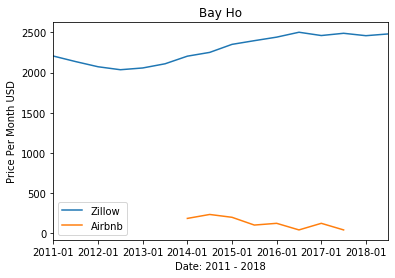

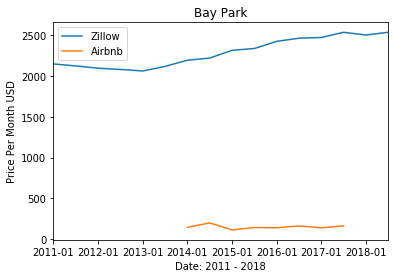

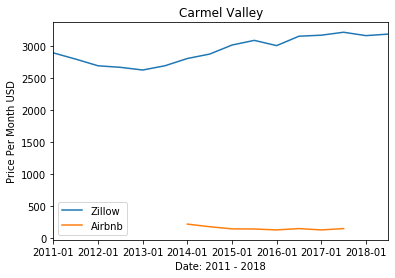

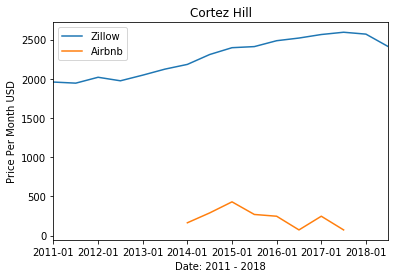

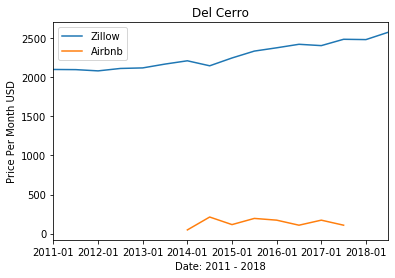

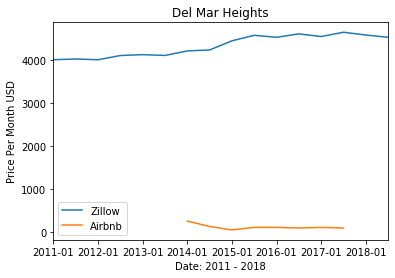

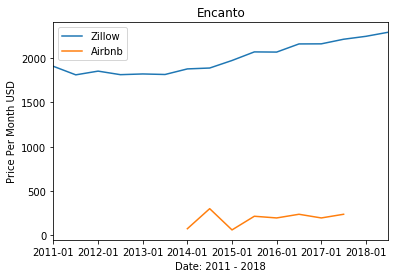

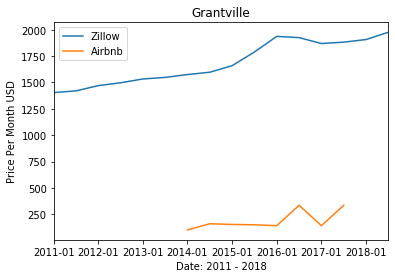

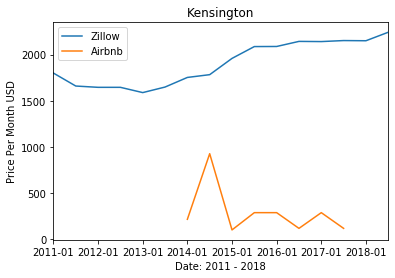

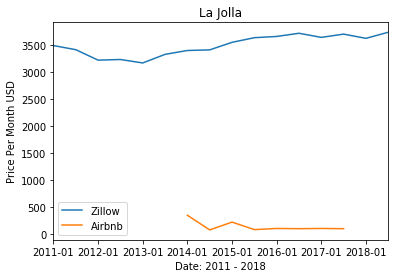

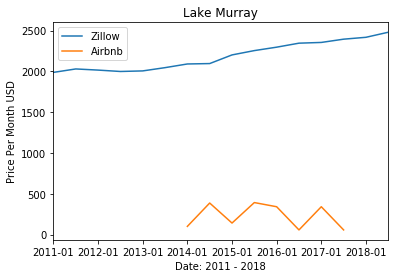

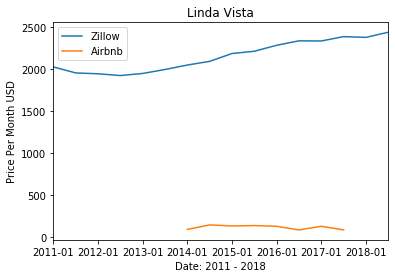

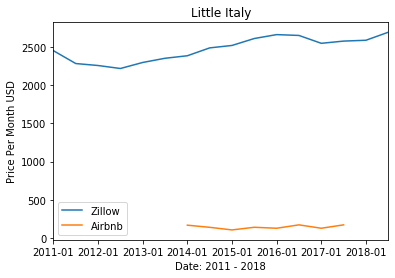

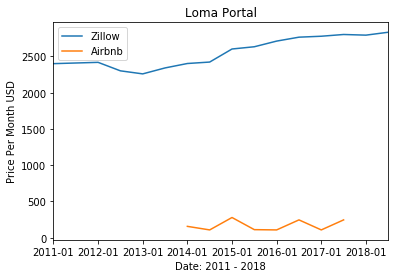

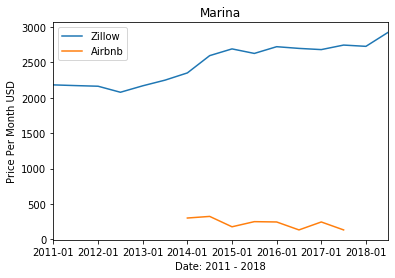

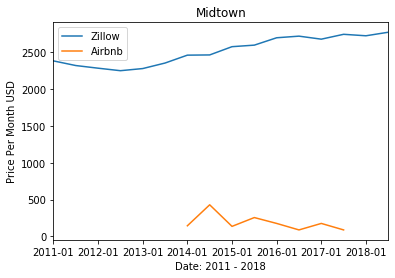

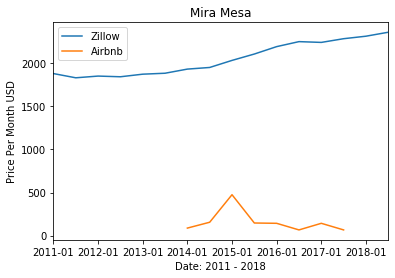

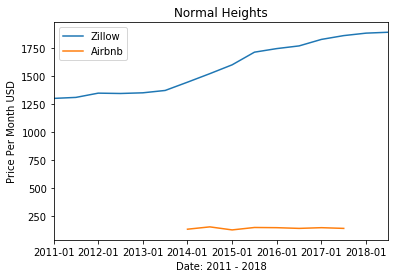

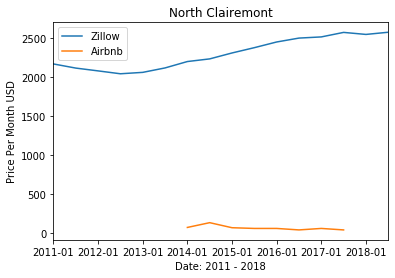

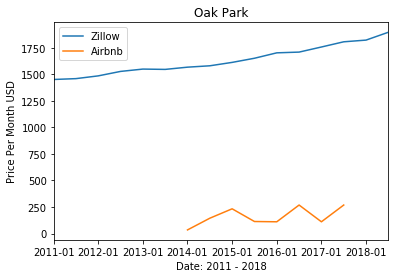

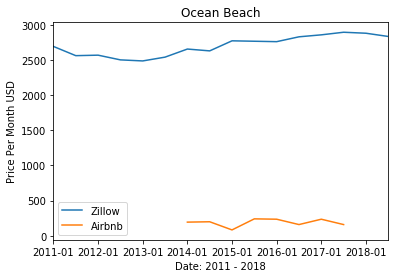

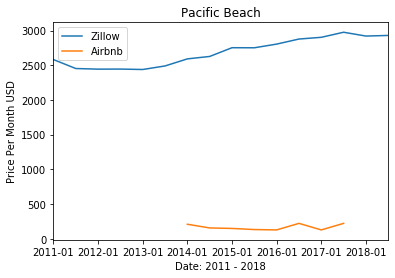

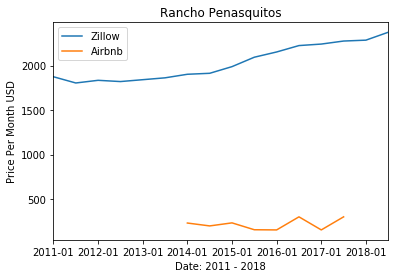

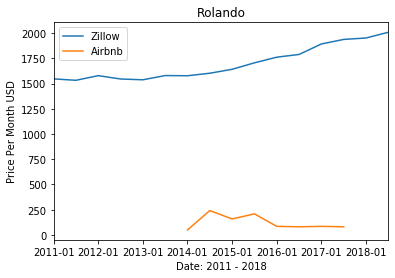

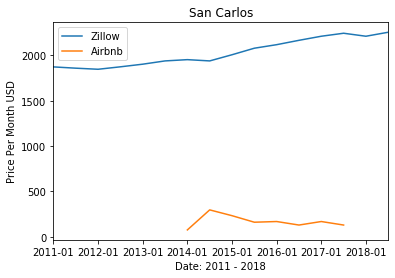

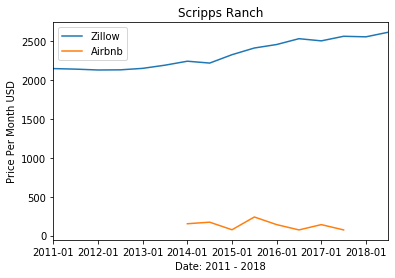

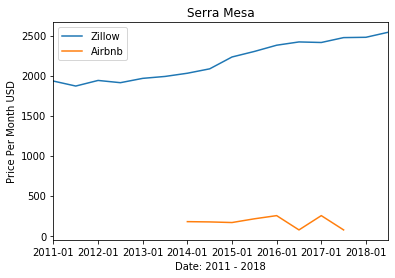

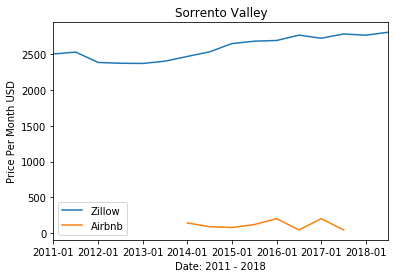

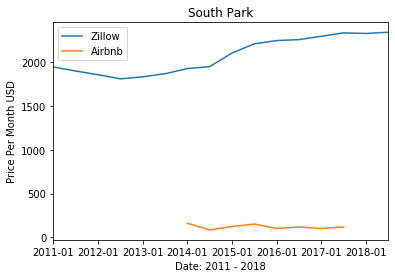

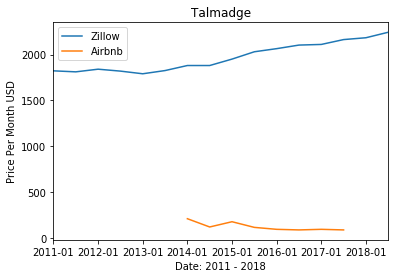

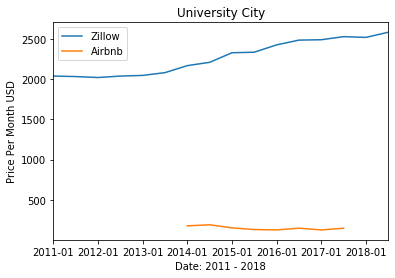

In [25]:
#Printing Figure Header
print("\nFIGURE 1\n")

#Loop through the columns
for i in range(0, 31):
    
    #Get same neighborhood for both airbnb and zillow
    zillow = df_zillow_rent.loc[i, :].squeeze()
    airbnb = df_airbnb_2.loc[i, :].squeeze()
    
    # Plot both data sets on the same graph
    zillow.iloc[1:].plot()
    airbnb.iloc[1:].plot(use_index = False)
    
    # Setting Labels and Title
    plt.xlabel("Date: 2011 - 2018")
    plt.ylabel("Price Per Month USD")
    plt.legend(["Zillow", "Airbnb"])
    plt.title(airbnb[0])
    
    # Show the Graph
    plt.show()

### Get just the data from 2014-2017 on both Airbnb and Zillow 
We want this data so we can compare directly zillow and airbnb

In [26]:
# Drop everything before 2014 in zillow
df_zillow_rent2 = df_zillow_rent.drop(df_zillow_rent.iloc[:,1:7], axis = 1)

# Drop everything after 2017 in zillow
df_zillow_rent2 = df_zillow_rent2.drop(df_zillow_rent2.iloc[:,9:11], axis = 1)

# Drop everything before 2014 in airbnb
df_airbnb_3 = df_airbnb_2.drop(df_airbnb_2.iloc[:,1:7], axis = 1)

# Data Analysis & Results

### Regression line visualization (Figure 2)
We wanted to create a a visualization of each neighborhood with both the Zillow and Airbnb prices. With this we will be able to make inferences about the price increase and decrease in both from years 2014-2017. Additionally, we wanted to add regression lines to use the slope values and compare them if they appear negative or postive. 

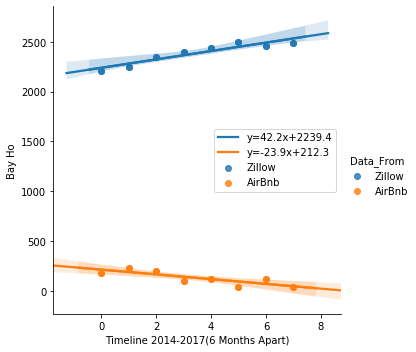

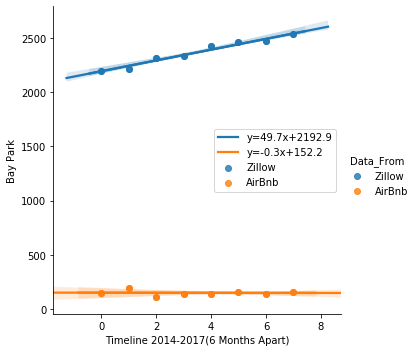

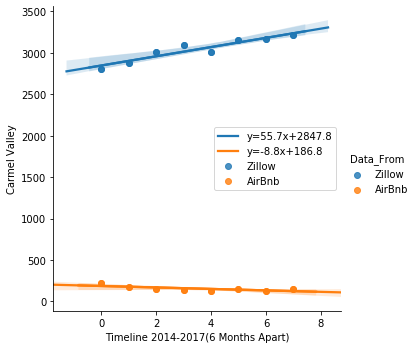

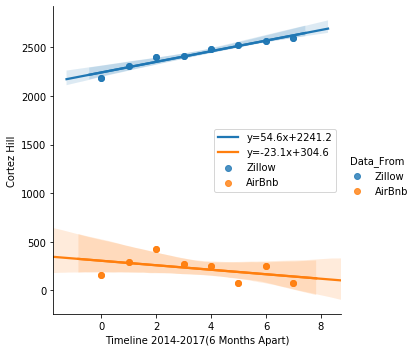

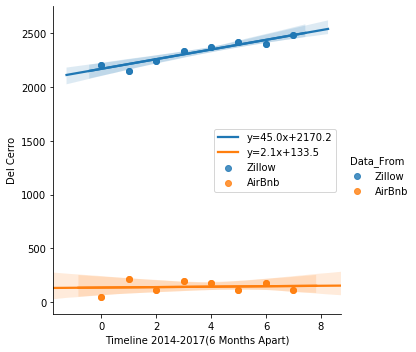

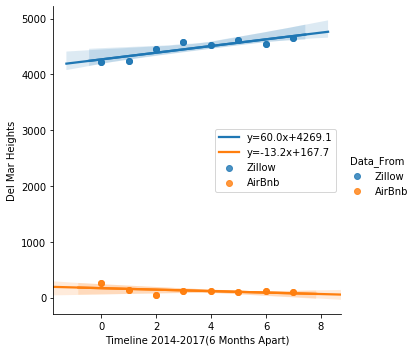

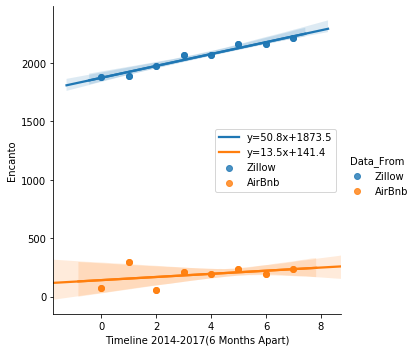

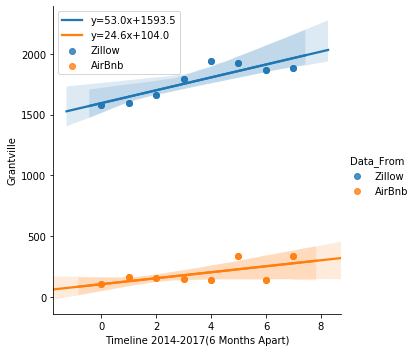

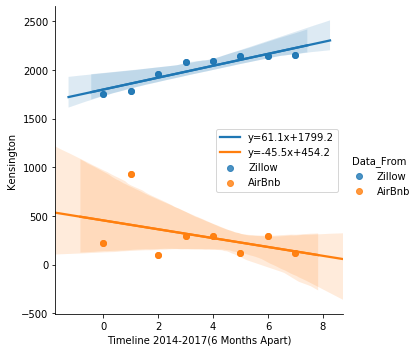

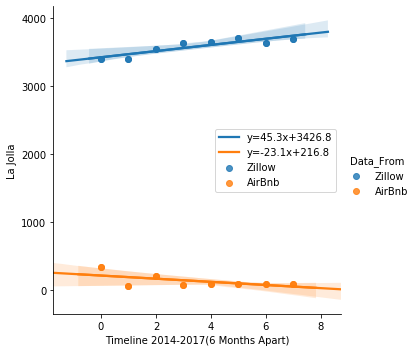

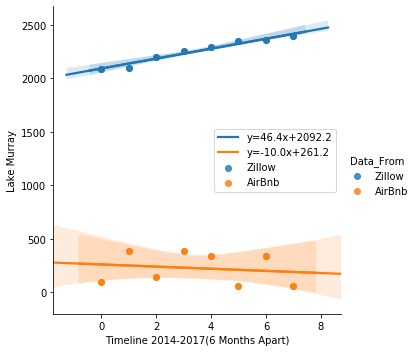

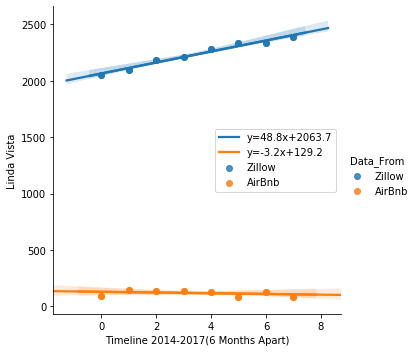

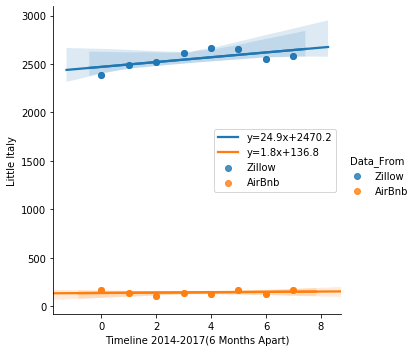

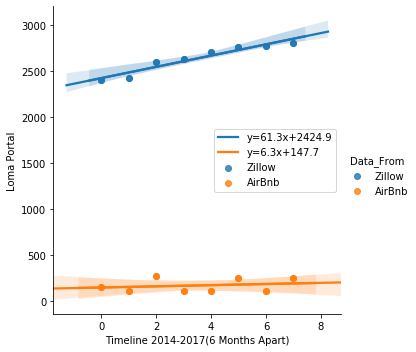

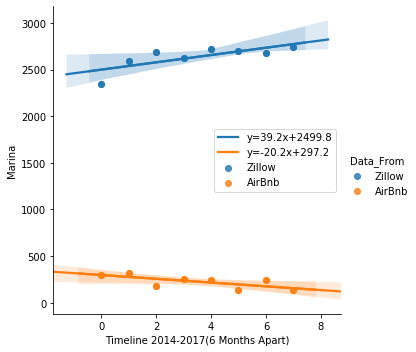

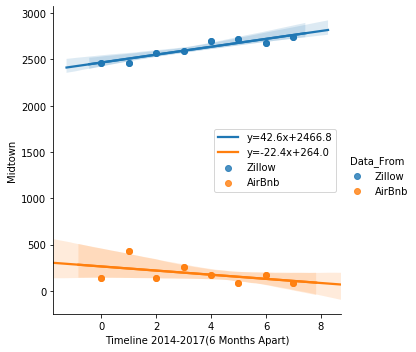

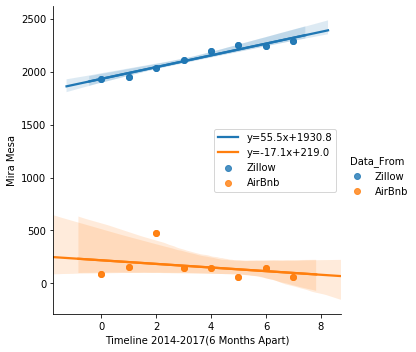

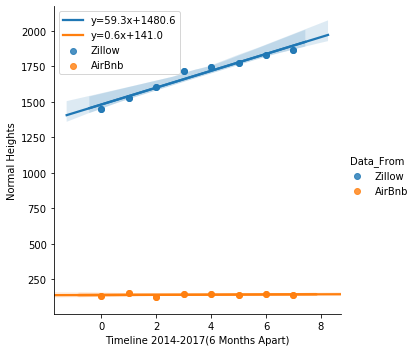

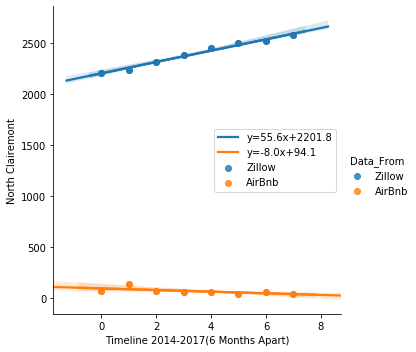

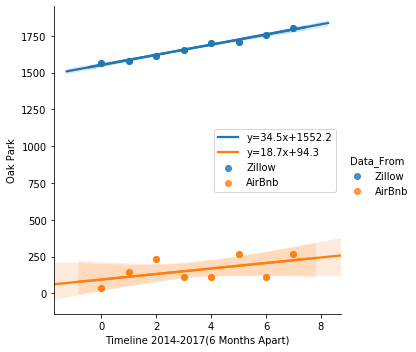

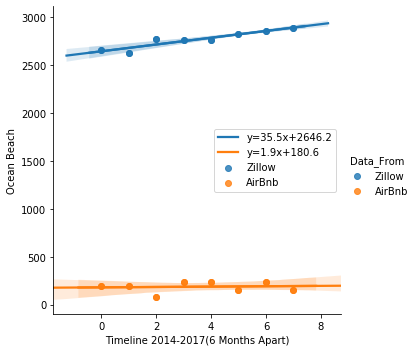

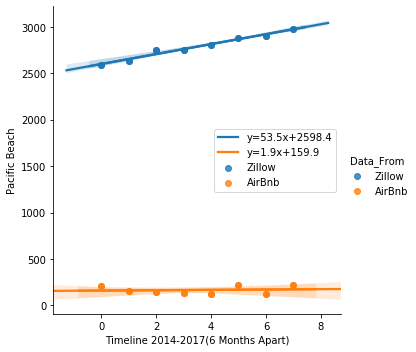

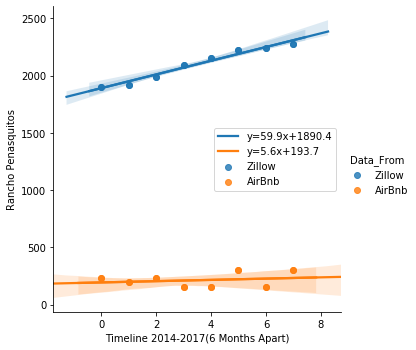

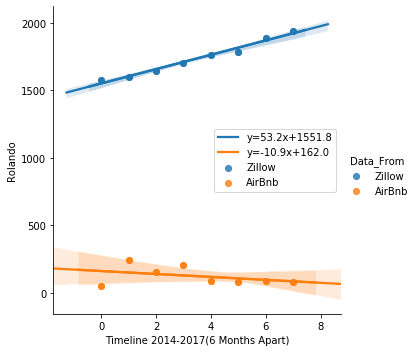

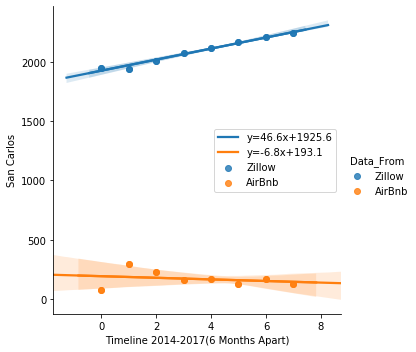

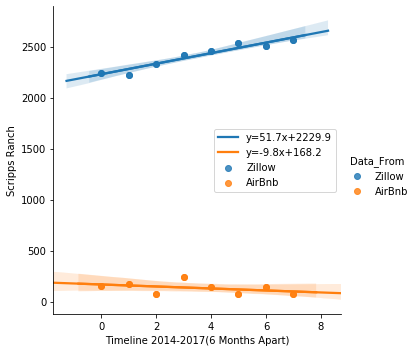

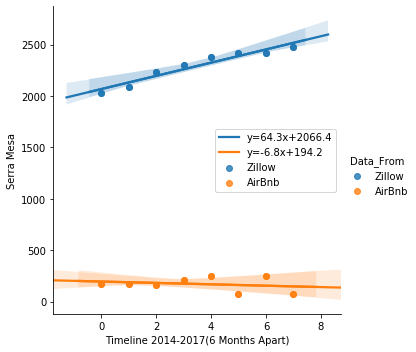

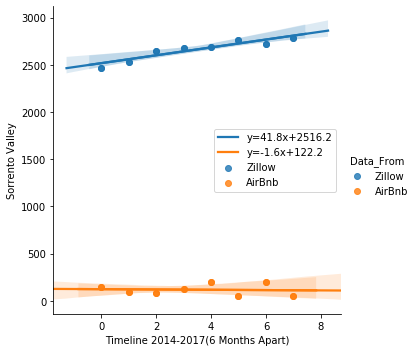

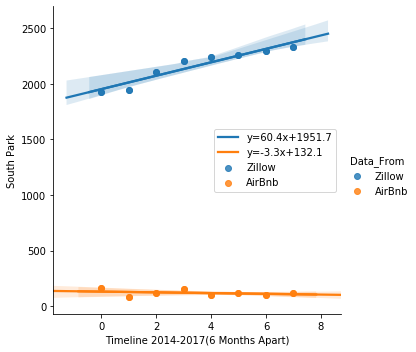

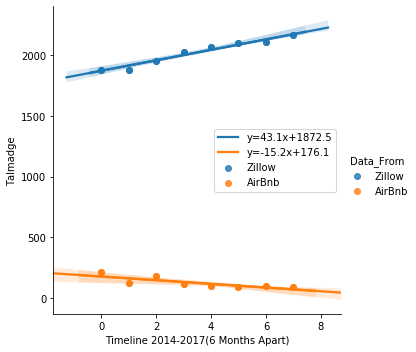

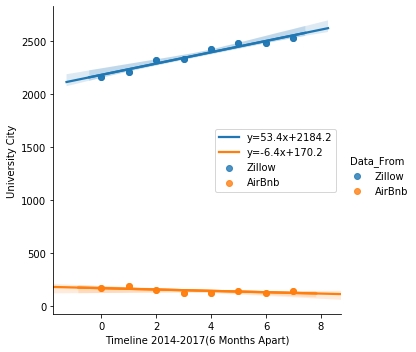

In [27]:
# Create empty lists for the slope of the regressions
slope_zillow = []
slope_airbnb = []

# Create empty dataframs for the data from airbnb and zillow to go into
z1 = pd.DataFrame()
a1 = pd.DataFrame()

#loop through each column
for i in range(0, 31):
    
    # Get a Column from each data set
    zillow = df_zillow_rent2.loc[i, :].squeeze()
    airbnb = df_airbnb_3.loc[i, :].squeeze()
    
    # turn the prices from float to int
    z1[zillow[0]] = zillow.iloc[1:].astype('int32')
    a1[airbnb[0]] = airbnb.iloc[1:].astype('int32')

# Reset the index for the zillow data
z1 = z1.reset_index()
z1 = z1.drop(columns = 'index', axis = 1 )
z1 = z1.reset_index()

# Reset the index for the Airbnb data
a1 = a1.reset_index()
a1 = a1.drop(columns = 'index', axis = 1 )
a1 = a1.reset_index()

# Combine both data frams so we can graph them on the same graph
Z = pd.concat([z1.assign(Data_From='Zillow'), a1.assign(Data_From='AirBnb')])

# Rename the to be soon x-axis
Z = Z.rename(columns={"index": "Timeline 2014-2017(6 Months Apart)"})

#Loop through each column in the dataframe again to get y values which are neighborhoods
i=0
for (columnName, columnData) in Z.iteritems():
    
    #If the comumn is the x-axis skip because you want neightborhoods for y-axis
    if i == 0:
        i += 1
        continue
    
    #If no more neighborhoods to loop through
    elif i > 31:
        break
    
    #If you found a neighborhood for your y-value
    else:
        #Plot both graphs on the same graph
        sns.lmplot(x="Timeline 2014-2017(6 Months Apart)", y=columnName, hue="Data_From", data=Z, fit_reg=True)
        
        #Separate out the airbnb data and zillow data for ease of calling them
        W = Z[Z['Data_From'] == 'Zillow']
        R = Z[Z['Data_From'] == 'AirBnb']
        
        #Get stats numbers for regerssion line for zillow data
        slope, intercept, r_value, p_value, std_err = stats.linregress(W["Timeline 2014-2017(6 Months Apart)"],W[columnName])
        
        #Add the regression label equation for zillow data
        ax = sns.regplot(x="Timeline 2014-2017(6 Months Apart)", y=columnName, data=W, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
        
        #Add the slope to the zillow slope list
        slope_zillow.append(slope)
        
        #Get stats numbers for regerssion line for airbnb data
        slope, intercept, r_value, p_value, std_err = stats.linregress(R["Timeline 2014-2017(6 Months Apart)"],R[columnName])
        
        #Add the regression label equation for airbnb data
        ax = sns.regplot(x="Timeline 2014-2017(6 Months Apart)", y=columnName, data=R, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
        
        #Add the slope to the airbnb slope list
        slope_airbnb.append(slope)
                               
        #Show the legend
        ax.legend()
        
        #Show the graphs
        plt.show()
    
    # incease the iterator
    i += 1

### Analyzing the regression lines (Figure 3)
We now wanted to find the slopes of the regression lines. In order to do so, we grabbe the slopes and added it to a dataframe.

In [28]:
#Empty data frame for the slopes of the linear regression lines
LR = pd.DataFrame()

#Add the zillow slope data to the LR frame
LR['Zillow'] = slope_zillow

#Add the Airbnb slope data to the LR frame
LR['AirBnb'] = slope_airbnb

#Set the index as the neighborhood names
LR['Neightborhoods'] = df_zillow_rent2['RegionName']

#Add the difference in percentage between zillow and airbnb to the data frame
LR['Difference In Percentage'] = LR['AirBnb'] / LR['Zillow']

LR

,Zillow,AirBnb,Neightborhoods,Difference In Percentage
0,42.166667,-23.880952,Bay Ho,-0.566347
1,49.738095,-0.285714,Bay Park,-0.005744
2,55.678571,-8.845238,Carmel Valley,-0.158863
3,54.630952,-23.130952,Cortez Hill,-0.423404
4,45.023810,2.071429,Del Cerro,0.046007
5,60.047619,-13.190476,Del Mar Heights,-0.219667
6,50.821429,13.452381,Encanto,0.264699
7,53.035714,24.642857,Grantville,0.464646
8,61.142857,-45.535714,Kensington,-0.744743
9,45.333333,-23.142857,La Jolla,-0.510504


### Visualization of slopes for increase in rent price (Figure 4)
We wanted to see how many observations had positive slopes (increase in rent price).

In [29]:
#Just see the positive increases in price relative to airbnb
positive = LR[LR['Difference In Percentage'] > 0]

#reset index to get correct numbers
positive = positive.reset_index()
positive = positive.drop(columns = 'index', axis = 1 )

#Show dataframe
positive

,Zillow,AirBnb,Neightborhoods,Difference In Percentage
0,45.023810,2.071429,Del Cerro,0.046007
1,50.821429,13.452381,Encanto,0.264699
2,53.035714,24.642857,Grantville,0.464646
3,24.857143,1.833333,Little Italy,0.073755
4,61.273810,6.309524,Loma Portal,0.102973
5,59.297619,0.607143,Normal Heights,0.010239
6,34.523810,18.726190,Oak Park,0.542414
7,35.452381,1.940476,Ocean Beach,0.054735
8,53.523810,1.880952,Pacific Beach,0.035142
9,59.916667,5.559524,Rancho Penasquitos,0.092788


### Visualization of slopes for increase in rent price (Figure 5)
We wanted to see how many observations had positive slopes (increase in rent price).

In [30]:
#Just see the negative increases in price relative to airbnb
negative = LR[LR['Difference In Percentage'] < 0]

#reset index to get correct numbers
negative = negative.reset_index()
negative = negative.drop(columns = 'index', axis = 1 )

#Show dataframe
negative

,Zillow,AirBnb,Neightborhoods,Difference In Percentage
0,42.166667,-23.880952,Bay Ho,-0.566347
1,49.738095,-0.285714,Bay Park,-0.005744
2,55.678571,-8.845238,Carmel Valley,-0.158863
3,54.630952,-23.130952,Cortez Hill,-0.423404
4,60.047619,-13.190476,Del Mar Heights,-0.219667
5,61.142857,-45.535714,Kensington,-0.744743
6,45.333333,-23.142857,La Jolla,-0.510504
7,46.392857,-10.011905,Lake Murray,-0.215807
8,48.809524,-3.190476,Linda Vista,-0.065366
9,39.190476,-20.178571,Marina,-0.514885


### Comparing before and after Airbnb on Zillow prices
To see the comparison of how much difference in rent prices were affected by Airbnb, we had to gather the data sets into Series.

In [31]:
#Empty series for the before, after and difference to hold data
before_airbnb = pd.Series()
after_airbnb = pd.Series()
difference = pd.Series()

#loop through the dataframe through each neighborhood
for i in range(0, 30):
    
    
    zillow = df_zillow_rent.loc[i,:].squeeze()
    
    #add the average before airbnb in zillow to the series in a specific neighborhood
    before_airbnb = before_airbnb.append(pd.Series([zillow[1:7].mean()]), ignore_index=True)
 
    #add the average after airbnb in zillow to the series in a specific neighborhood
    after_airbnb = after_airbnb.append(pd.Series([zillow[7:17].mean()]), ignore_index=True)

    #add the difference in averages due to airbnb in zillow to the series in a specific neighborhood
    difference = difference.append(pd.Series([zillow[7:17].mean() - zillow[1:7].mean()]), ignore_index=True)

#add the series to the main dataframe
df_zillow_rent['Before AirBnb Average Price'] = before_airbnb
df_zillow_rent['After AirBnb Average Price'] = after_airbnb
df_zillow_rent['Difference'] = difference

#df_zillow_rent
    

### Extracting the data from above to create a bar graph visual (Figure 6)


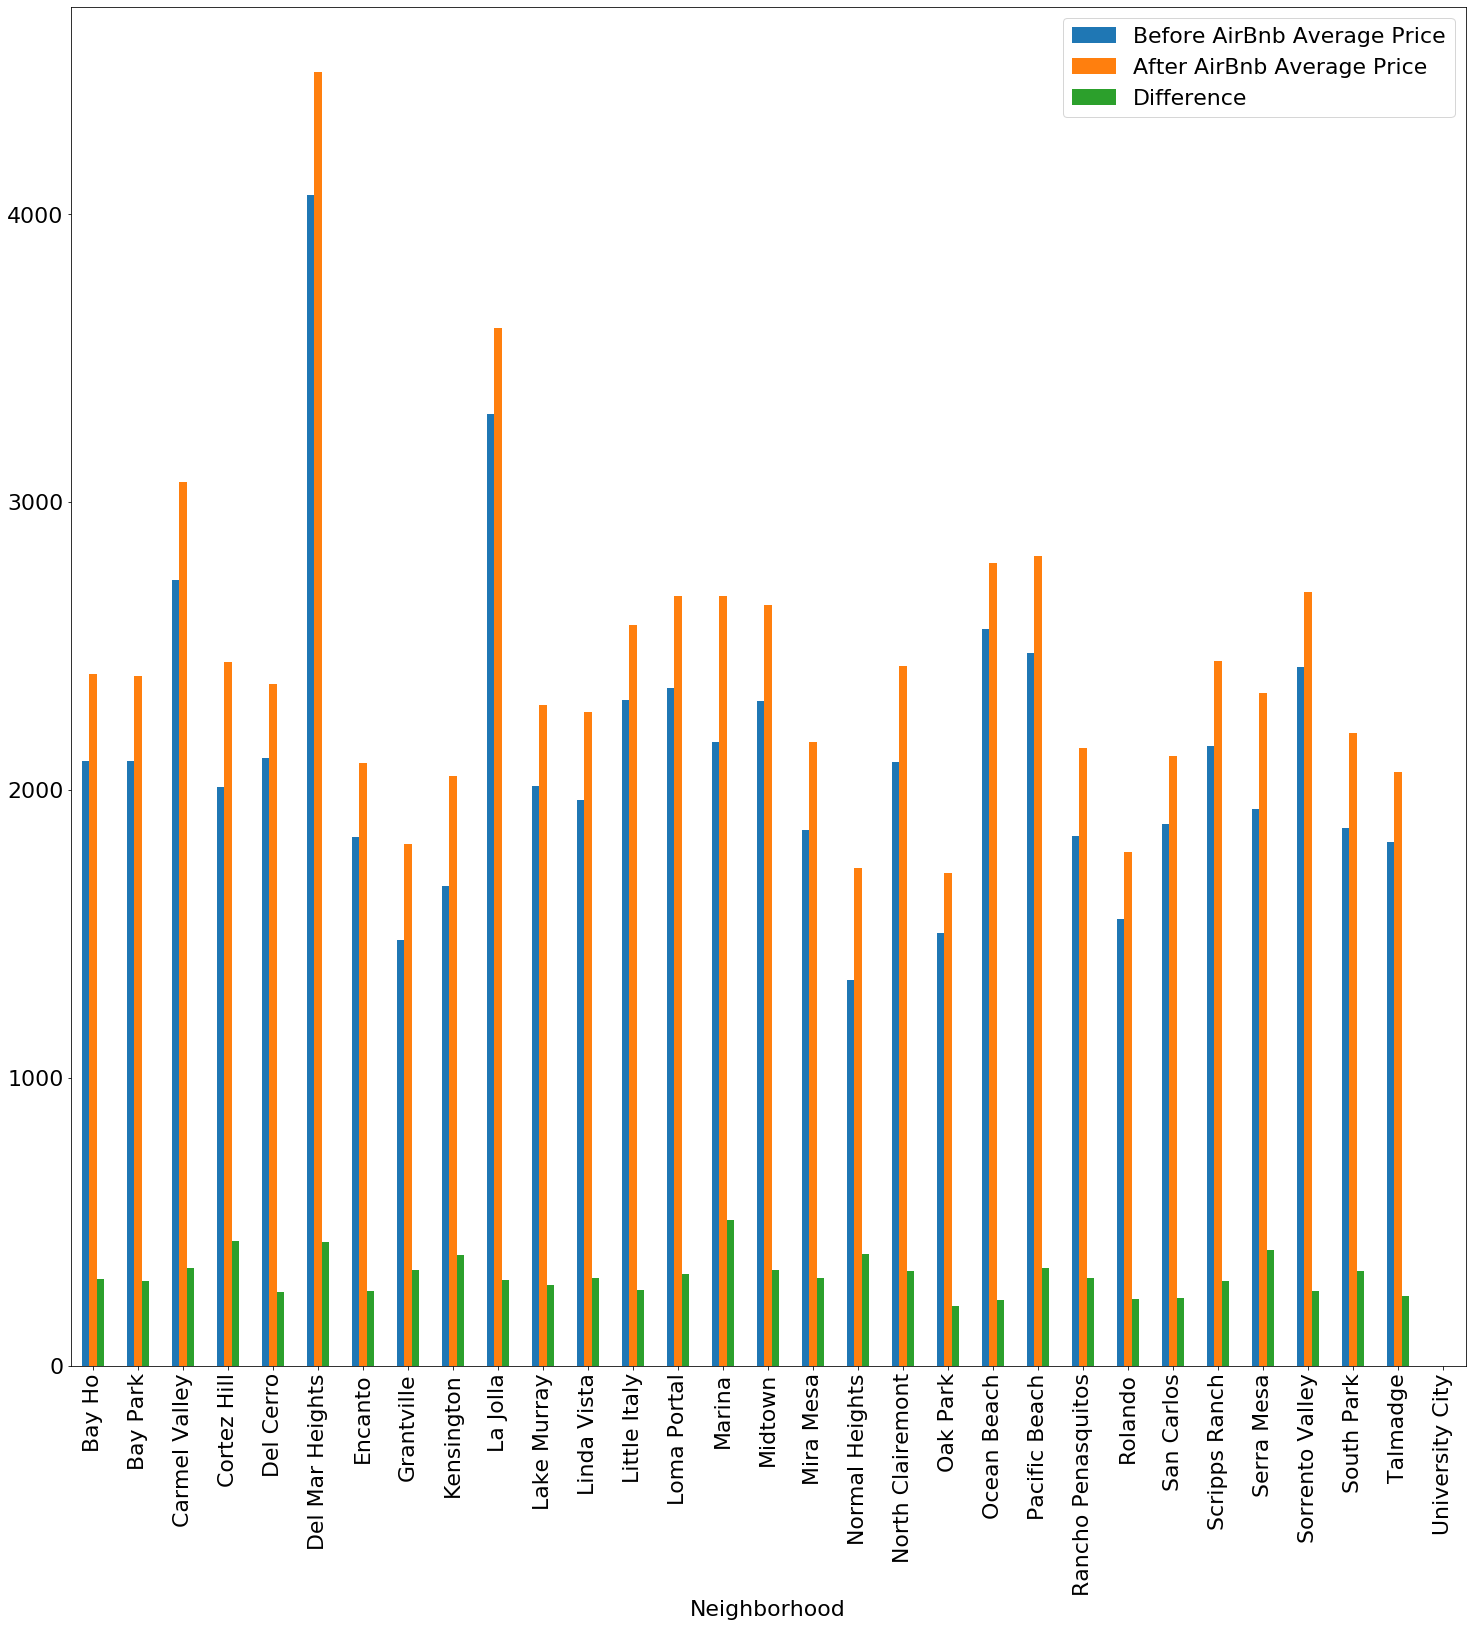

In [32]:
#Get the data necessary for the bar graph
df_zillow_bar = df_zillow_rent.drop(df_zillow_rent.iloc[:,1:17], axis = 1)

#Rename the x-axis to neighborhood
df_zillow_bar = df_zillow_bar.rename(columns={"RegionName": "Neighborhood"})
df_zillow_bar = df_zillow_bar.set_index('Neighborhood')

#Adjust bar plot size
plt.rcParams.update({'font.size': 22})
df_zillow_bar.plot.bar(figsize=(25,25))

### Number of Airbnb increase and rent prices from 2014 from 2017 (figure 7&8)

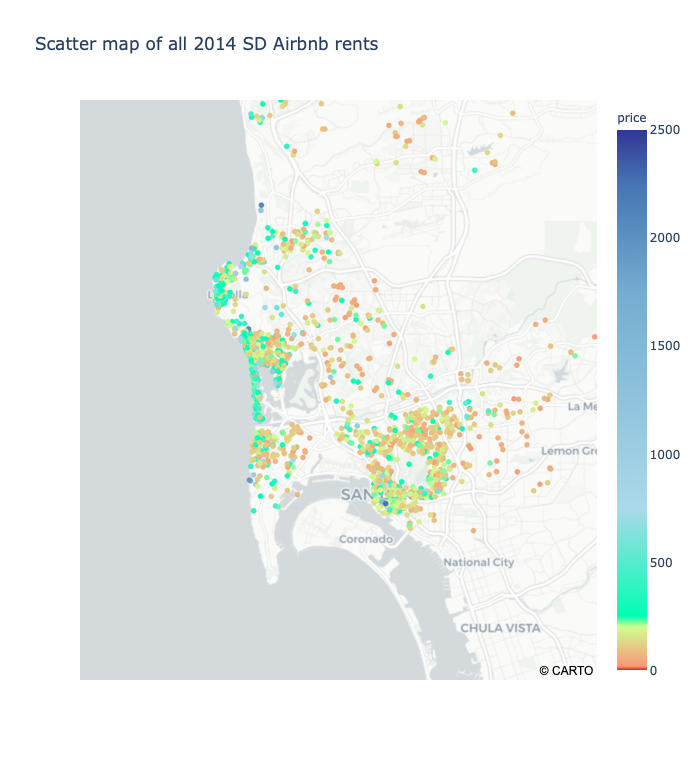

In [33]:
Image(filename='2014.png') 

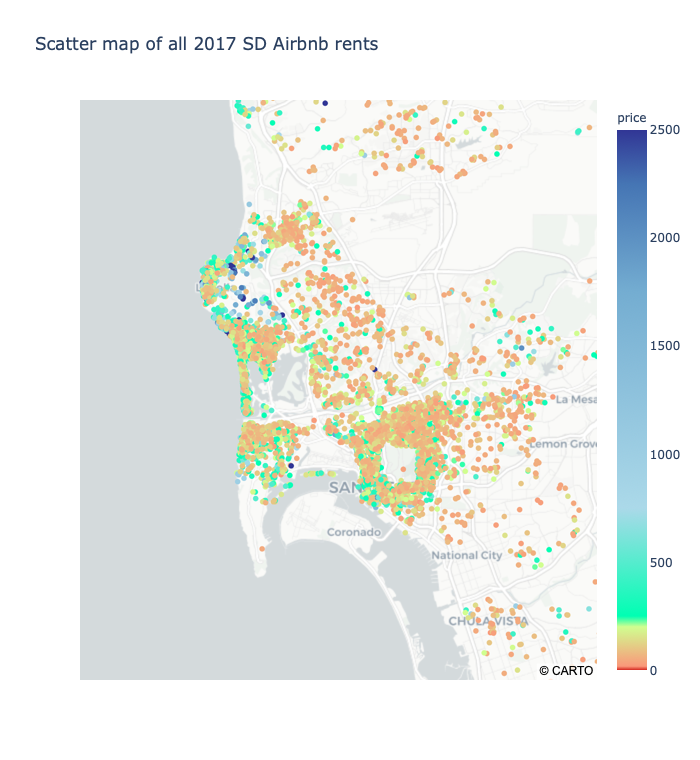

In [34]:
Image(filename='2017.png') 

# Ethics & Privacy

Both datasets are publicly available used in many Kaggle projects and cited with articles. As for public side of the data, Zillow has their datasets listed on their website under Zillow research portion which is publicly available to download. For Airbnb data scraping, Tom Slee has performed and collabrated with Inside Airbnb to tackle research topics regarding the Airbnb prices, and the data has been mentioned in multiple papers and articles which highlights the lack of privacy concern. Additionally the data we are using are anonymized and does not include sensitive information regarding the listing of rentals in both and Zillow and Airbnb. 

The dataset is raw data of prices and location of Airbnb’s in each city. We are soley looking at prices in a time frame and neighborhood locations in San Diego. Therfore, we are not using sensitive data such as personalized data that can hinder with privacy and ethics. We also will not focus our analysis on specific addresses but on surrounding locations based on the locations of an Airbnb. During our data cleaning process, we dropped columns regarding any possible scenarios when "the right to be forgotten" would take place. By dropping columns such as host id, longitude and latitude, our project would already have them removed which will not voilate anyone's privacy. Moreoever, our project focuses on objective inferences given from the rental prices in San Diego. 

One of the potential biases that can face is the distribution of rent prices according to wealthy and non-wealthy neighborhoods. Definetly neighborhoods such as Torrey Pines and Wooded Area will have higher concentraion in annual income per household compared to Oak Park and Rolando. Another bias we can attribute is the popularity by visitor levels, as touristy neighborhoods will have higher rent prices in general with higher booking rates as well. Additionally these biases can also be attributed to ethnic groups within the neighborhood as well. Our way to overcome these biases are to compare the average rent prices per neighborhood rather than summarizing all cities into one and we also avoided any potential labeling of a city that might bring up these biases as well.


# Conclusion 
Airbnb over the years has been dominating the rental industry by offering inexpensive short and long term stays. So much so that they have an impact on renters and landlords. Our initial hypothesis was that Airbnb would positively impact the surrounding city. We anticipated that the competition that Airbnb brought to the rental market would potentially drive down the rental prices. The average rental price increased after Airbnb established itself. 

The majority of our focus was on the local neighborhoods in San Diego. We can see from the Bar Plot that the average home rental price increased significantly after the establishment of Airbnb in 2014 (Figure 6). The average increase in rent in all neighborhoods was around 300USD. University City was impacted more than any other neighborhood, with a difference of $500. The correlation between the number of inexpensive housing options Airbnb provides and the rental increases by landlords and renters can also be seen in the maps provided above. The number of Airbnb rentals in 2014 skyrocketed by 2017. The number of available rentals has increased by 373 percent according to our data with the majority of them listed well below 500USD. 

We hypothesized that home rentals will go down as a cheap alternative service, Airbnb, grows in numbers. However, most of the Airbnb (60 percent of our observation) prices went down as all home rentals increased. We believe that one of the contributing factors to this observation is because, with an increase of Airbnb listings increases almost 373 percent from the year 2014 to 2017, the competition had a significant role. Due to this abundance, we also believe that there were fewer homes to rent, which caused a demand and supply situation for homeowners to rent out their houses. As there are fewer available houses to rent, an increase in price went into effect. Moreover, Airbnb service does not require new homes to be built, therefore it may contribute to the scarcity of homes to be rented as more homeowners convert their long term rentals to short term.



# Discussion

Some improvements considering that we had more time area better observations with long years. and appropriate data sets, having a full range of when Airbnb was introduced in 2008 to 2020 would have been a good comparison to run our test on. Our analysis was lacking in the number of observations that could match up with the 10-year data set provided in the Zillow dataset. Additionally, it would have been beneficial to find the data set’s in other booking websites that could also contribute to the rent price increase we found from our analysis. This would help us understand the pattern with more plots. Lastly, being able to see the demographic of who is visiting concerning the outside or within San Diego would have given a better insight into how the rent prices can fluctuate. While our project focuses solely on San Diego, we believe that to further our project we can run this model on different cities that are presented in the Zillow data and ultimately see the impact it has on different states as a whole. 

There were some confounding variables we had to consider throughout the project. There are various reasons why apartments may differ in prices. Unfortunately, the CSV file we obtained for the Zillow data didn’t provide any insight into factors that may affect rent prices such as amenities, furnishings, schools in the area, etc. In the end, we are making claims about San Diego housing prices without having the full picture.


# Team Contributions
* John Joungseo Kim
    * Write up, Data Cleaning, Discussion & Conclusion
* Oscar Reyes
    * Data Cleaning/Processing, Data Visualization
* Hae-Chan Grace Kim
    * Research, Write up, Discussion & Conclusion
* Edgar Matias
    * Data Cleaning/Processing, Discussion & Conclusion
* Aaron Hernandez
    * Data Cleaning/Processing, Data Visualization, Data Analysis

